In [18]:
import random
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [19]:
def uniform_sample_2d(c: tuple, r: float, n: int, label: str) -> dict:
    data = []
    
    for i in range(n):
        angle = random.uniform(0, 2*math.pi)
        dist = random.uniform(0, r)

        data.append([c[0]+dist*math.cos(angle), c[1]+dist*math.sin(angle)])
    
    return {
        'features': np.array(data),
        'label': label
    }

In [20]:
sample1 = uniform_sample_2d((-1, -1), 2, 250, 'A')
sample2 = uniform_sample_2d((1, 1), 2, 250, 'B')

data = [sample1, sample2]

In [21]:
df = pd.DataFrame(columns=['x1', 'x2', 'label'])

for sample in data:
    for feature in sample['features']:
        df.loc[len(df.index)] = [*feature, sample['label']]

label_mapping = {
    'A': -1,
    'B': 1
}

df['y'] = df['label'].map(lambda x: label_mapping[x])

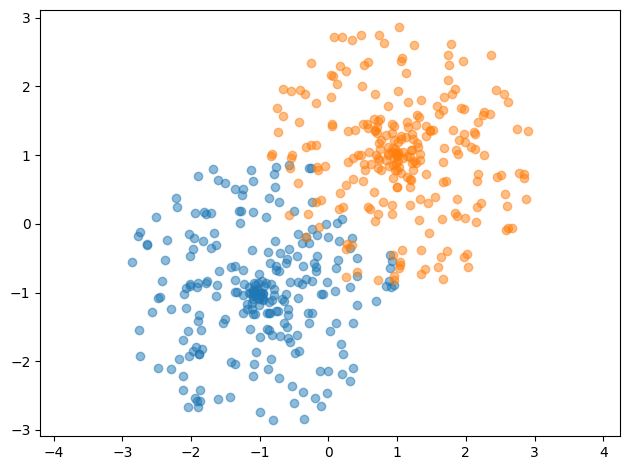

In [22]:
for label in df['label'].unique():
    plt.scatter(df[df['label'] == label]['x1'], df[df['label'] == label]['x2'], alpha=0.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [23]:
test_frac = 0.8

p = np.random.permutation(df.index.size)

test_size = int(p.size*test_frac)
train_size = int(p.size*(1-test_frac))

idx_test = p[0:test_size]
idx_train = p[test_size:p.size]

xTest = np.array(df.iloc[idx_test][['x1', 'x2']])
yTest = np.array(df.iloc[idx_test]['y'])

xTrain = np.array(df.iloc[idx_train][['x1', 'x2']])
yTrain = np.array(df.iloc[idx_train]['y'])

In [26]:
def predict(w1: float, w2: float, b: float, x:np.ndarray) -> np.ndarray:
        return w1 * x[0] + w2 * x[1] + b


def loss(w1: float, w2: float, b: float, x:np.ndarray, y: np.ndarray) -> float:
        Ypred = np.array([predict(w1, w2, b, xi) for xi in x])
        d = np.linalg.norm(Ypred-y)
        return 1/y.shape[0] * np.sum(d)

In [35]:
w1 = random.uniform(-1, 1)
w2 = random.uniform(-1, 1)
b = 0

lr = 1e-2
batch_size = 32
max_iter = 100

print('untrained loss: ', loss(w1, w2, b, xTest, yTest).round(3))

for j in range(max_iter):
    idxs = np.random.choice(a=np.arange(xTrain.shape[0]), size=batch_size, replace=False)

    for i in idxs:
        yPred = predict(w1, w2, b, xTrain[i])

        dLdw1 = 2 * (yPred - yTrain[i]) * xTrain[i][0]
        dLdw2 = 2 * (yPred - yTrain[i]) * xTrain[i][1]
        dLdb = yPred
    
        w1 -= lr * dLdw1
        w2 -= lr * dLdw2
        b -= lr * dLdb

print('trained loss: ', loss(w1, w2, b, xTest, yTest).round(3))

TP_count = 0
for x, y in zip(xTest, yTest):
    yPred = predict(w1, w2, b, x)
    TP_count += 1 if np.argmax(y) == np.argmax(yPred) else 0

accuracy = TP_count / xTest.shape[0]
print('accuracy: ', accuracy)

print(f'w1 = {round(w1, 3)}')
print(f'w2 = {round(w2, 3)}')
print(f'b = {round(b, 3)}')

untrained loss:  0.086
trained loss:  0.026
accuracy:  1.0
w1 = 0.286
w2 = 0.465
b = -0.123


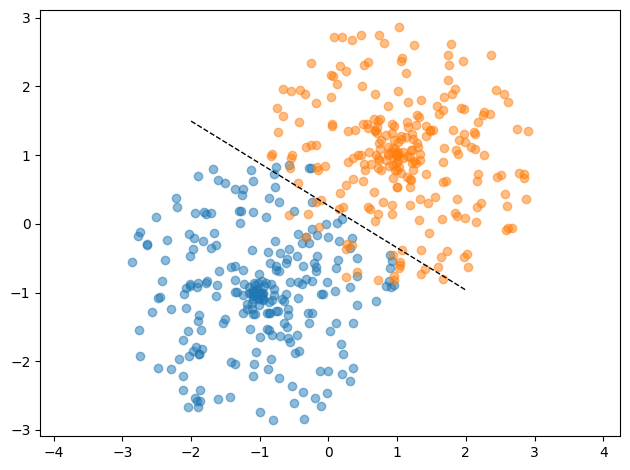

In [36]:
x = np.linspace(-2, 2, 100)
y = -w1/w2 * x - b/w2

for label in df['label'].unique():
    features = df[df['label'] == label]
    x1, x2 = features['x1'], features['x2']
    plt.scatter(x1, x2, alpha=0.5)

plt.plot(x, y, c='black', lw=1, ls='--')

plt.axis('equal')
plt.tight_layout()
plt.show()